## Swarm Behaviour Data
Projeto Final da disciplina de Soluções em Mineração de Dados

Aluno: Andrey Moutelik (arma2)

### Imports de bibliotecas e datasets

Importando o dataset e as bibliotecas necessárias

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00524/Swarm%20Behavior%20Data.zip

--2023-04-20 04:19:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/00524/Swarm%20Behavior%20Data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222915673 (213M) [application/x-httpd-php]
Saving to: ‘Swarm Behavior Data.zip.1’

Swarm Behavior Data 100%[===================>] 212.59M  43.4MB/s    in 5.5s    

2023-04-20 04:19:06 (39.0 MB/s) - ‘Swarm Behavior Data.zip.1’ saved [222915673/222915673]



In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from zipfile import ZipFile
file_name = "Swarm Behavior Data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


Descrição das features:

xm e ym são a posição (X,Y) de cada boid;

xVeln e yVeln são o vetor de velocidade;

xAm e yAm são o vetor de alinhamento;

xSm e ySm são o vetor de separação;

xCm e yCm são o vetor de coesão;

nACm é o número de boids em um raio de Alinhamento/Coesão;

nSm é o número de boids no raio de Separação.

Esses atributos são repetidos para todos os m boids, onde m = 1,...,200. (12*200 = 2 400)

Resultando em *2400 FEATURES*


In [ ]:
df_Aligned = pd.read_csv("/content/Swarm Behavior Data/Aligned.csv", low_memory= False)
df_Flocking = pd.read_csv("/content/Swarm Behavior Data/Flocking.csv", low_memory= False)
df_Grouped = pd.read_csv("/content/Swarm Behavior Data/Grouped.csv", low_memory= False)

In [ ]:
# tem um bug no dataset na coluna class de 'Flocking', aqui corrijo isso
df_Flocking['Class'] = df_Flocking['Class ']
df_Flocking = df_Flocking.drop(['Class '], axis=1)
df_Flocking.x1[24015] = 0

In [ ]:
df_Flocking.describe()

,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,nAC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
count,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,...,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.00000,24016.00000
mean,-73.077114,-0.737331,0.041984,-0.148090,0.151028,-1.217209,-0.835799,-0.035581,0.075808,19.029772,...,0.065710,-0.125927,0.127226,-1.660584,-0.095942,-0.017049,0.085548,26.258744,2.14736,0.50000
std,572.552115,6.445250,7.374884,0.377028,0.590219,27.762943,21.669753,0.558147,0.626971,23.233237,...,7.709457,0.380757,0.571121,77.201164,7.362780,0.551924,0.613370,33.997001,7.53273,0.50001
min,-1012.180000,-18.590000,-18.410000,-1.000000,-1.000000,-944.070000,-847.910000,-2.680000,-2.680000,0.000000,...,-18.440000,-1.040000,-1.000000,-4079.230000,-370.240000,-2.680000,-2.680000,0.000000,0.00000,0.00000
25%,-609.352500,-5.520000,-5.710000,-0.230000,-0.010000,0.000000,0.000000,-0.040000,-0.020000,3.000000,...,-5.620000,-0.190000,0.000000,0.000000,0.000000,-0.072500,0.000000,2.000000,0.00000,0.00000
50%,-156.685000,-0.460000,-1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,...,-0.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.50000
75%,424.445000,3.820000,7.310000,0.000000,0.940000,0.000000,0.000000,0.000000,0.020000,31.000000,...,7.480000,0.000000,0.540000,0.000000,0.000000,0.000000,0.020000,35.000000,1.00000,1.00000
max,1015.800000,18.470000,18.630000,1.000000,1.040000,68.560000,234.740000,2.680000,2.680000,157.000000,...,18.530000,1.000000,1.040000,255.990000,68.940000,2.680000,2.680000,142.000000,65.00000,1.00000


### Checagem de valores faltantes, valores duplicados, e paridade entre os datasets

Checar valores faltantes nos datasets

In [ ]:
missing_aligned_values = df_Aligned.isna().sum()
print("Valores Faltando do dataset Aligned")
print(missing_aligned_values)

missing_flocking_values = df_Flocking.isna().sum()
print("Valores Faltando do dataset Flocking")
print(missing_flocking_values)

missing_grouped_values = df_Grouped.isna().sum()
print("Valores Faltando do dataset Grouped")
print(missing_grouped_values)

Valores Faltando do dataset Aligned
x1        0
y1        0
xVel1     0
yVel1     0
xA1       0
         ..
xC200     0
yC200     0
nAC200    0
nS200     0
Class     0
Length: 2401, dtype: int64
Valores Faltando do dataset Flocking
x1        0
y1        0
xVel1     0
yVel1     0
xA1       0
         ..
xC200     0
yC200     0
nAC200    0
nS200     0
Class     0
Length: 2401, dtype: int64
Valores Faltando do dataset Grouped
x1        0
y1        0
xVel1     0
yVel1     0
xA1       0
         ..
xC200     0
yC200     0
nAC200    0
nS200     0
Class     0
Length: 2401, dtype: int64


Devido a estrutura dos datasets eu assumo que, com exceção da última coluna os três são identicos

Aqui eu faço a checagem dessa hipótese

In [ ]:
dfA_drop = df_Aligned.iloc[:, :-1]
dfF_drop = df_Flocking.iloc[:, :-1]
dfG_drop = df_Grouped.iloc[:, :-1]
are_equal = dfA_drop.equals(dfF_drop)

# Print the result.
print(f'Os DataFrames Aligned e Flocking são iguais? {are_equal}')

are_equal = dfA_drop.equals(dfG_drop)
print(f'Os DataFrames Aligned e Grouped são iguais? {are_equal}')

Os DataFrames Aligned e Flocking são iguais? False
Os DataFrames Aligned e Grouped são iguais? True


A suposição estava parcialmente correta, os valores dos datasets Aligned e Grouped são iguais, porém os de Flocking são diferentes 

In [ ]:
diff = dfA_drop.compare(dfF_drop)
num_diff = len(diff)
print(f'Os DataFrames Aligned e Flocking tem {num_diff} valores diferentes.')

Os DataFrames Aligned e Flocking tem 24016 valores diferentes.


Curiosamente, os datasets tem 24016 valores diferentes, o que corresponde exatamente ao número de linhas neles contidos

Vai que apenas uma linha é diferente entre os dois datasets?

Testo em seguida essa possibilidade:

In [ ]:
diff_count = (dfA_drop.ne(dfF_drop)).sum(axis=1)

# Print the count of differences per row.
print('Count of differences per row:')
print(diff_count)

Count of differences per row:
0           1
1           1
2           1
3           1
4           1
         ... 
24011    1780
24012    1385
24013    1027
24014    1635
24015    2044
Length: 24016, dtype: int64


Não é o caso.

Porém uma coisa é interessante, começamos com vários 'uns' e embaixo temos valores bastante altos. E se a maioria das linhas do dataset contém apenas um atributo diferente na comparação?

In [ ]:
diff_count = (dfA_drop.ne(dfF_drop)).sum(axis=1)

# Print the count of differences per row.
print('Count of differences per row:')
#print(diff_count)

print(diff_count.nsmallest(17295))

Count of differences per row:
0          1
1          1
2          1
3          1
4          1
        ... 
17290      1
17291      1
17292      1
22855    494
23298    505
Length: 17295, dtype: int64


17293, cerca de 72% de meu dataset, corresponde a essa suposição, o resto das linhas tendo de 494 a 2380 atributos diferentes. Se quisermos misturar esses datasets essas linhas restantes deverão ser eliminadas

Verifico agora a possibilidade de linhas duplicadas:

In [ ]:
duplicate_entries = df_Aligned.duplicated()
print(f'Numero de linhas duplicadas nos df_Aligned e Grouped: {duplicate_entries.sum()}')
duplicate_entries = df_Flocking.duplicated()
print(f'Numero de linhas duplicadas no df_Flocking: {duplicate_entries.sum()}')

Numero de linhas duplicadas nos df_Aligned e Grouped: 0
Numero de linhas duplicadas no df_Flocking: 0


### Gráficos de Balanceamento

Por fim, vemos o balanceamento das classes nos dataset

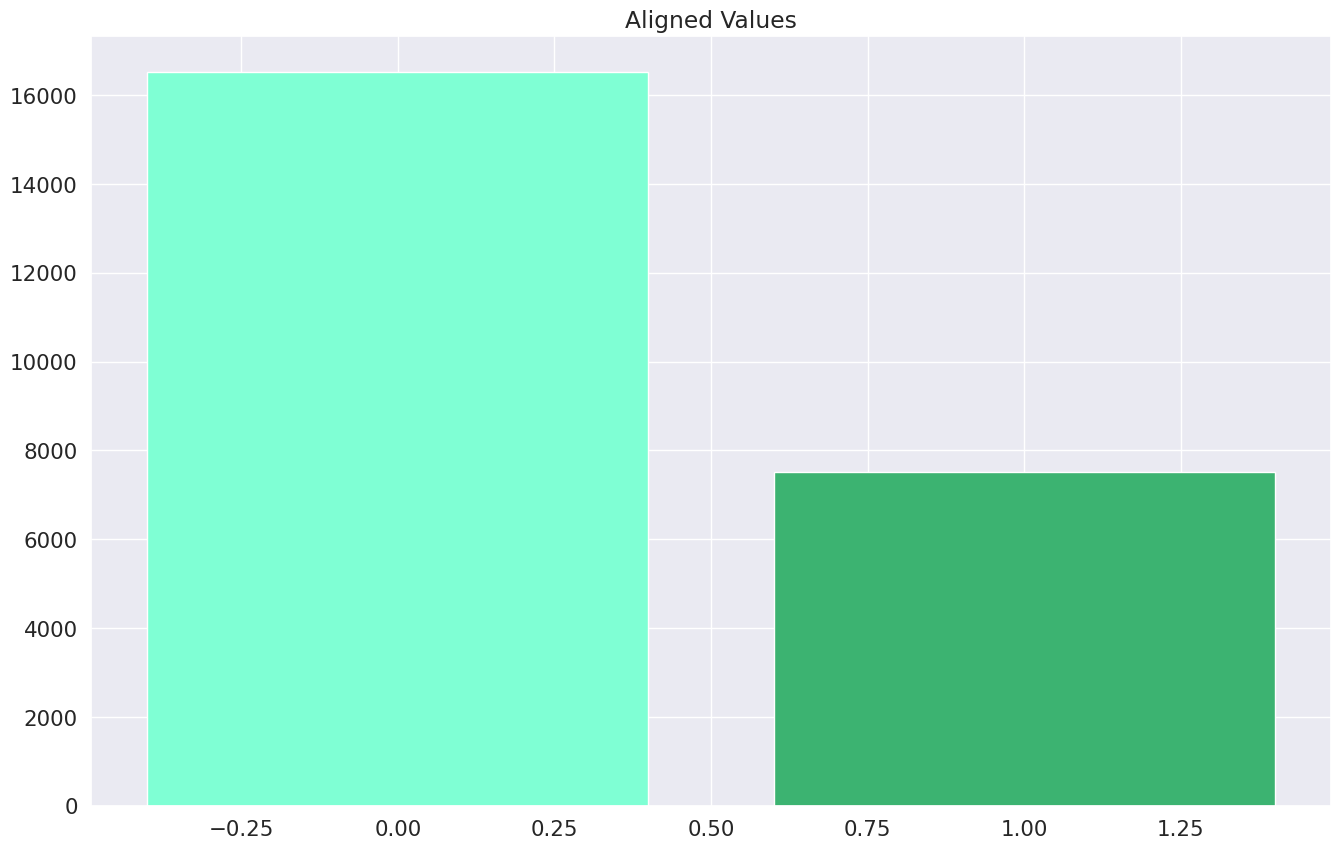

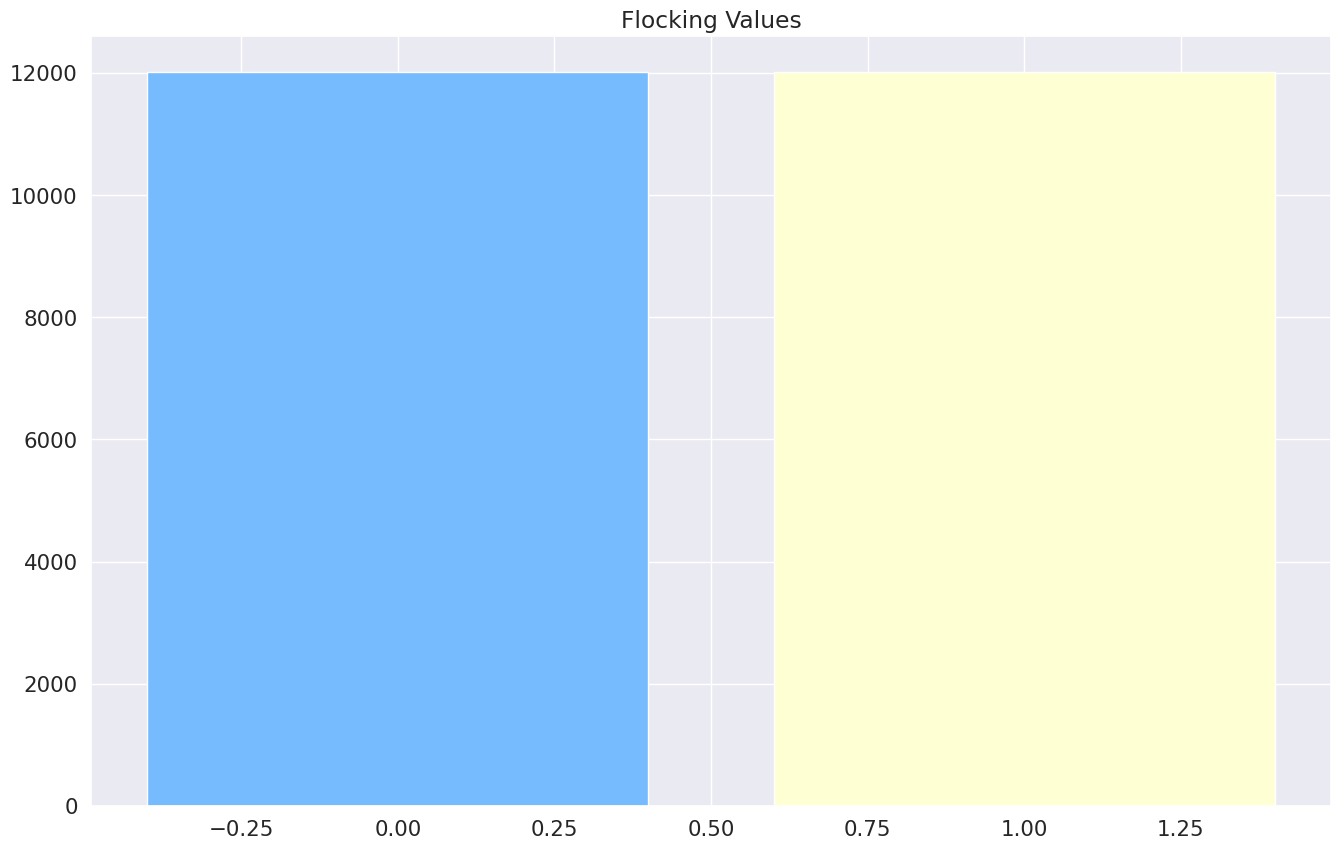

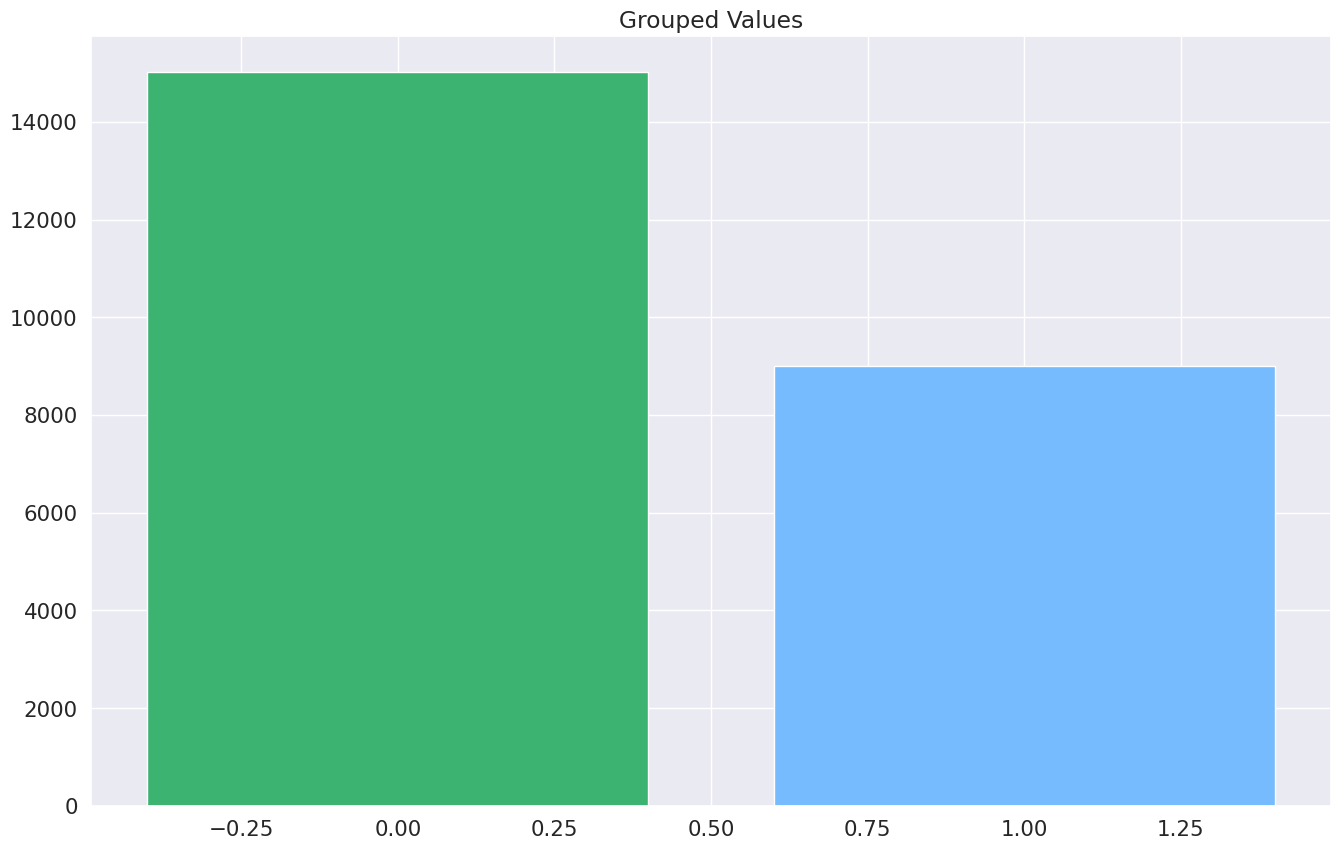

In [ ]:
aligned_counts = df_Aligned['Class'].value_counts()
flocking_counts = df_Flocking['Class'].value_counts()
grouped_counts = df_Grouped['Class'].value_counts()

plt.bar(aligned_counts.index, aligned_counts.values, color=['aquamarine','mediumseagreen'])
plt.title("Aligned Values")
plt.show()

plt.bar(flocking_counts.index, flocking_counts.values, color=['xkcd:sky blue', 'xkcd:eggshell'])
plt.title("Flocking Values")
plt.show()

plt.bar(grouped_counts.index, grouped_counts.values, color=['mediumseagreen', 'xkcd:sky blue'])
plt.title("Grouped Values")
plt.show()

Para 'Aligned' e 'Grouped', os datasets estão desbalanceados, o primeiro um pouco mais que o segundo.

Curiosamente, para Flocking o dataset está perfeitamente balanceado

In [ ]:
print(aligned_counts)
print(flocking_counts)
print(grouped_counts)

0    16511
1     7505
Name: Class, dtype: int64
0    12008
1    12008
Name: Class, dtype: int64
0    15010
1     9006
Name: Class, dtype: int64


### Dividindo o dataset em Train e Test

Primeiramente, para essa etapa do projeto, vou optar por tratar apenas de um dataset: o de 'Aligned'. O processo de preparação de dados é práticamente identico para todos eles ('Flocking' porém não precisará de balanceamento), e poderá ser facilmente replicado depois

A separação do dataset é feita logo no começo pois não queremos aplicar as técnicas de sampling no subset de teste. Isso poderia resultar em um bias indesejado no dataset, e estimativas de performance muito otimistas

In [ ]:
from sklearn.model_selection import train_test_split

y = df_Aligned["Class"]
X = df_Aligned.drop("Class", axis=1)

A porcentagem de split para teste não tem um valor exato, mas geralmente é 20 ou 30%. Neste caso, considerando a quantidade de entradas e que o dataset de treino diminuirá de tamanho devido ao undersampling, optei por usar 20%

In [ ]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(f"Shape of X_train: {X_train_base.shape}")
print(f"Shape of X_test: {X_test_base.shape}")
print(f"Shape of y_train: {y_train_base.shape}")
print(f"Shape of y_test: {y_test_base.shape}")

Shape of X_train: (19212, 2400)
Shape of X_test: (4804, 2400)
Shape of y_train: (19212,)
Shape of y_test: (4804,)


### Teste de modelos com os dados base

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Regressão Logistica

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training scores for each fold: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Testing scores for each fold: [1.0, 0.9994797086368367, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean testing score:, 1.0
Standard deviation of testing scores:, 0.000156
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3330
           1       1.00      1.00      1.00      1474

    accuracy                           1.00      4804
   macro avg       1.00      1.00      1.00      4804
weighted avg       1.00      1.00      1.00      4804

Accuracy score:, 1.0


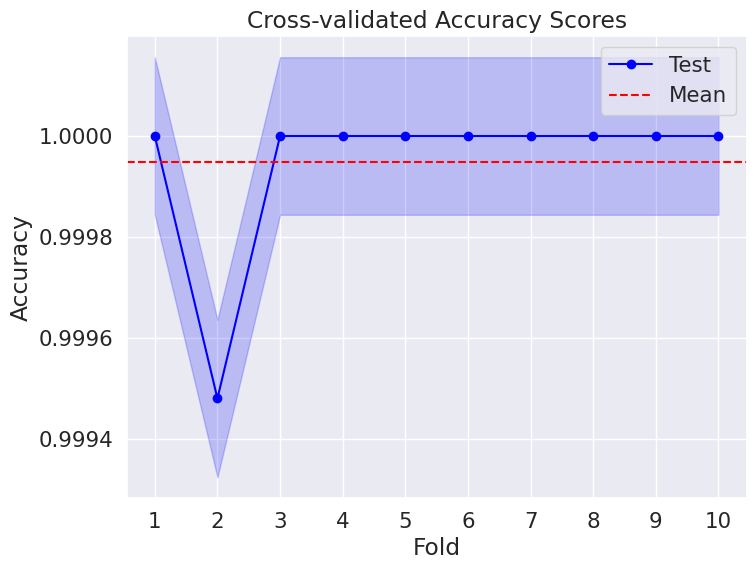

In [ ]:
# Initialize the LR model
lr_model = LogisticRegression(max_iter= 1500)

# Define the number of folds for cross-validation
k_folds = 10

# Initialize the stratified k-fold object
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing scores for each fold
train_scores = []
test_scores = []

# Loop over the folds of the cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    X_test_fold, y_test_fold = X_train.iloc[test_index], y_train.iloc[test_index]

    # Fit the SVM model on the training data
    lr_model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the training and testing data for this fold
    train_scores.append(lr_model.score(X_train_fold, y_train_fold))
    test_scores.append(lr_model.score(X_test_fold, y_test_fold))

# Print the training and testing scores for each fold
print("Training scores for each fold:", train_scores)
print("Testing scores for each fold:", test_scores)

# Compute the mean and standard deviation of the testing scores
test_mean = np.mean(test_scores)
test_std = np.std(test_scores)
print(f"Mean testing score:, {test_mean:.3}")
print(f"Standard deviation of testing scores:, {test_std:.3}")

# Print the classification report for the testing data
y_pred = lr_model.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

# Print the accuracy score for the testing data
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score:, {test_accuracy:.3}")

# Plot the cross-validated accuracy scores
plt.figure(figsize=(8, 6))
plt.title("Cross-validated Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.plot(range(1, k_folds+1), test_scores, 'o-', color="blue", label="Test")
plt.axhline(y=test_mean, color='red', linestyle='--', label="Mean")
plt.fill_between(range(1, k_folds+1), test_scores-test_std, test_scores+test_std, alpha=0.2, color="blue")
plt.xticks(range(1, k_folds+1))
plt.legend()
plt.show()


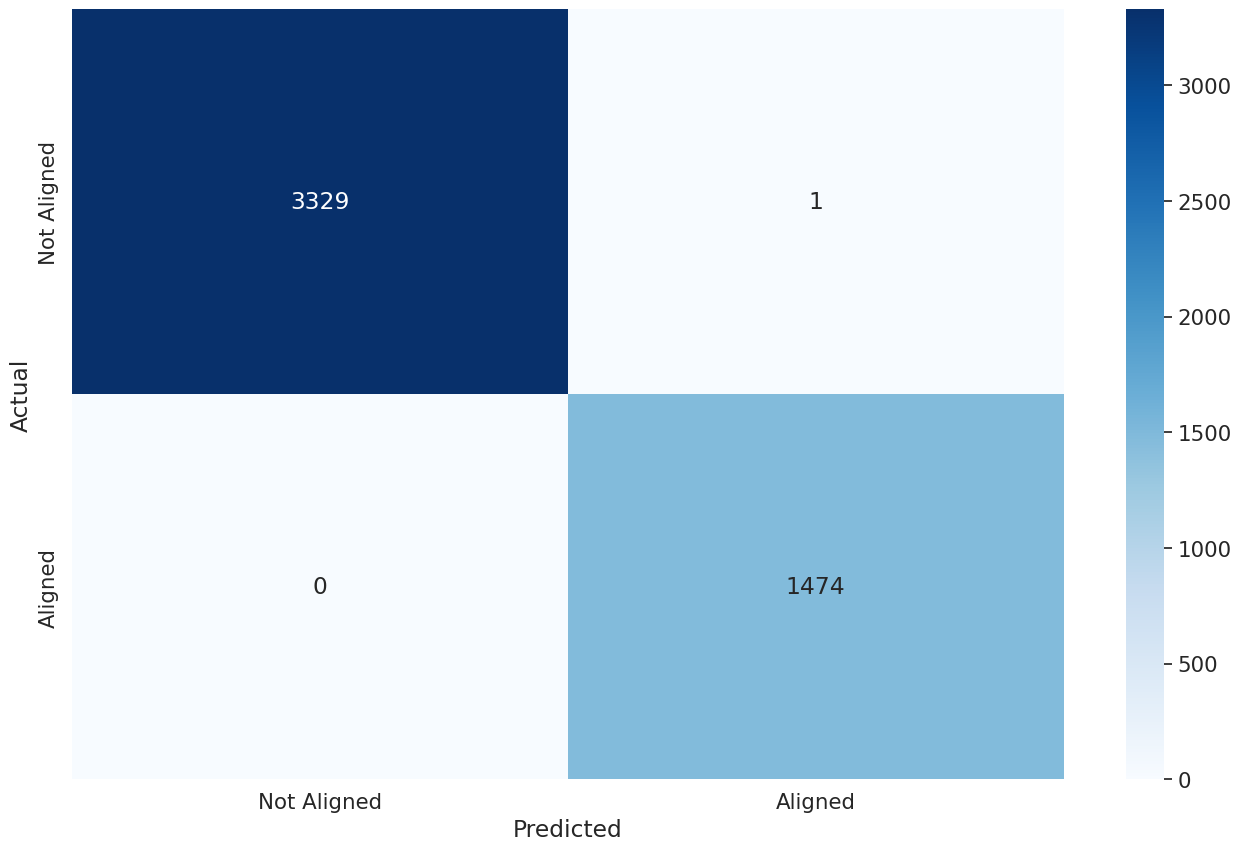

In [ ]:
datasetNum = 1

# Plot the confusion matrix
sns.set(font_scale=1.4)
cm = confusion_matrix(y_test, y_pred)
if(datasetNum == 1):
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Aligned', 'Aligned'], yticklabels=['Not Aligned', 'Aligned'])
elif (datasetNum == 2):
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Flocking', 'Flocking'], yticklabels=['Not Flocking', 'Flocking'])
else:
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Grouped', 'Grouped'], yticklabels=['Not Grouped', 'Grouped'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

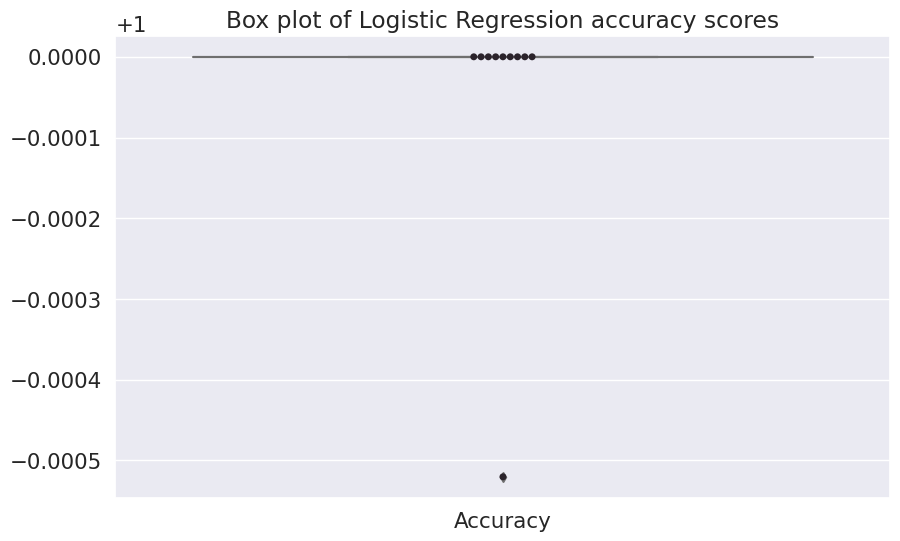

In [ ]:
# Plot the box plots
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=[test_scores], ax=ax, color='skyblue')
sns.swarmplot(data=[test_scores], ax=ax, palette='dark:purple')
ax.set_xticklabels(['Accuracy'])  
ax.set_title('Box plot of Logistic Regression accuracy scores')
plt.show()

#### SVM

Training scores for each fold: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Testing scores for each fold: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean testing score:, 1.0
Standard deviation of testing scores:, 0.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3330
           1       1.00      1.00      1.00      1474

    accuracy                           1.00      4804
   macro avg       1.00      1.00      1.00      4804
weighted avg       1.00      1.00      1.00      4804

Accuracy score:, 1.0


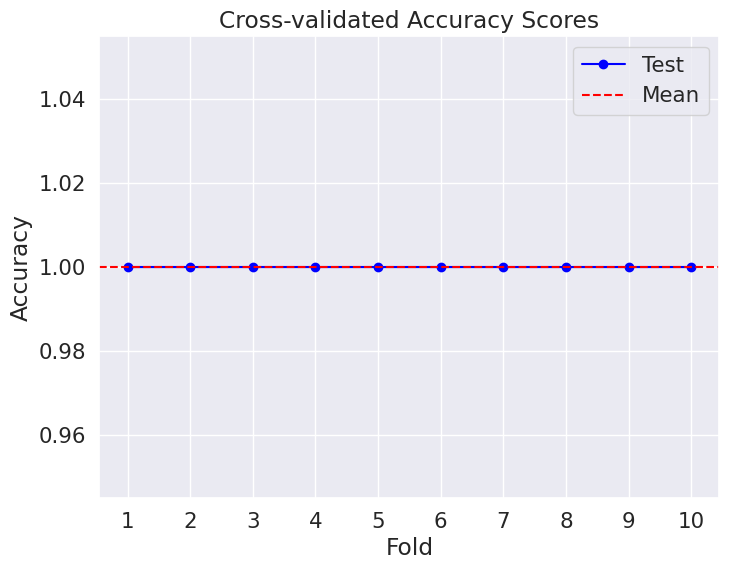

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Define the number of folds for cross-validation
k_folds = 10

# Initialize the stratified k-fold object
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store the training and testing scores for each fold
train_scores = []
test_scores = []

# Loop over the folds of the cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    X_test_fold, y_test_fold = X_train.iloc[test_index], y_train.iloc[test_index]

    # Fit the SVM model on the training data
    svm_model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the training and testing data for this fold
    train_scores.append(svm_model.score(X_train_fold, y_train_fold))
    test_scores.append(svm_model.score(X_test_fold, y_test_fold))

# Print the training and testing scores for each fold
print("Training scores for each fold:", train_scores)
print("Testing scores for each fold:", test_scores)

# Compute the mean and standard deviation of the testing scores
test_mean = np.mean(test_scores)
test_std = np.std(test_scores)
print(f"Mean testing score:, {test_mean:.3}")
print(f"Standard deviation of testing scores:, {test_std:.3}")

# Print the classification report for the testing data
y_pred = svm_model.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

# Print the accuracy score for the testing data
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score:, {test_accuracy:.3}")

# Plot the cross-validated accuracy scores
plt.figure(figsize=(8, 6))
plt.title("Cross-validated Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.plot(range(1, k_folds+1), test_scores, 'o-', color="blue", label="Test")
plt.axhline(y=test_mean, color='red', linestyle='--', label="Mean")
plt.fill_between(range(1, k_folds+1), test_scores-test_std, test_scores+test_std, alpha=0.2, color="blue")
plt.xticks(range(1, k_folds+1))
plt.legend()
plt.show()


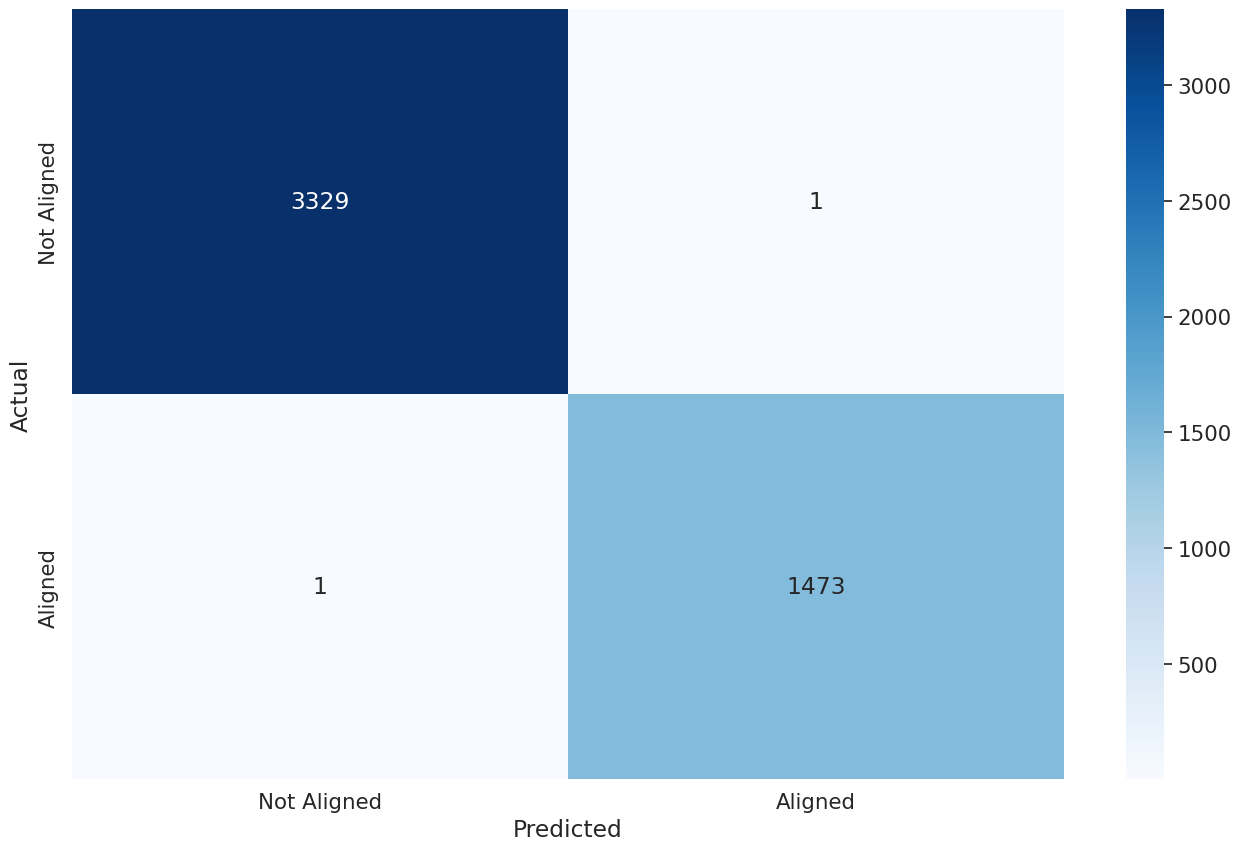

In [ ]:
datasetNum = 1

# Plot the confusion matrix
sns.set(font_scale=1.4)
cm = confusion_matrix(y_test, y_pred)
if(datasetNum == 1):
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Aligned', 'Aligned'], yticklabels=['Not Aligned', 'Aligned'])
elif (datasetNum == 2):
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Flocking', 'Flocking'], yticklabels=['Not Flocking', 'Flocking'])
else:
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Grouped', 'Grouped'], yticklabels=['Not Grouped', 'Grouped'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

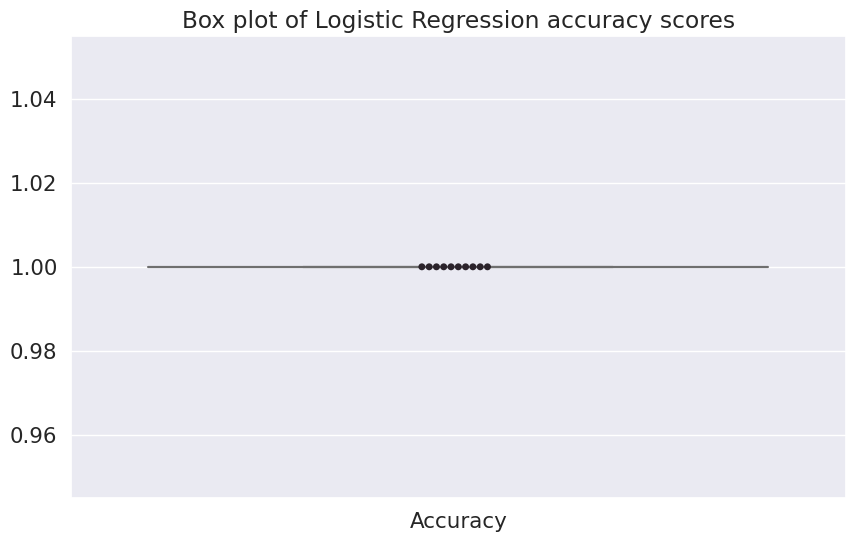

In [ ]:
# Plot the box plots
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=[test_scores], ax=ax, color='skyblue')
sns.swarmplot(data=[test_scores], ax=ax, palette='dark:purple')
ax.set_xticklabels(['Accuracy'])
ax.set_title('Box plot of SVM accuracy scores')
plt.show()

### Undersampling e Oversampling

O balanceamento será corrigido por meio de Undersampling seguido por Oversampling por SMOTE, com a intenção de resultar em um balanceamento de 50:50

Aqui optei por considerar o parâmetro de sampling_strategy no Undersampling como 0.7. Esse valor escolhi por me parecer adequado, mas posso modificá-lo no futuro se resultar em uma performance melhor nos modelos

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

samplingNum = 0.7   #0.7 p/ Aligned

rus = RandomUnderSampler(sampling_strategy= samplingNum, random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_base, y_train_base)

# Print the number of samples in each class after undersampling
print("Number of samples in each class after undersampling:")
print(y_train_resampled.value_counts())

# Apply oversampling to the resampled training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)

# Print the number of samples in each class after oversampling
print("Number of samples in each class after oversampling:")
print(y_train_resampled.value_counts())

Number of samples in each class after undersampling:
0    8615
1    6031
Name: Class, dtype: int64
Number of samples in each class after oversampling:
0    8615
1    8615
Name: Class, dtype: int64


### PCA

Por fim, aplicarei PCA, Principal Component Analysis, a fim de reduzir o número de features do dataset

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train_resampled)

Os dados são normalizados, e em seguida eu aplico PCA em um range de n_componentes, a fim de determinar o número de features mais adequado para o problema em questão. Optei por ir em intervalos de 100 até chegar em 1500 devido ao longo tempo de execução da célula seguinte

In [ ]:
# Initialize PCA with a range of n_components
n_components_range = range(100, 1501, 100)  # range of 100, 200, 300, ..., 1500
explained_variances = []
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)
    explained_variances.append(sum(pca.explained_variance_ratio_))
    print("Components:" ,n_components)

Components: 100
Components: 200
Components: 300
Components: 400
Components: 500
Components: 600
Components: 700
Components: 800
Components: 900
Components: 1000
Components: 1100
Components: 1200
Components: 1300
Components: 1400
Components: 1500


Aqui faço um gráfico da Variância Explicada x Número de Componentes Principais

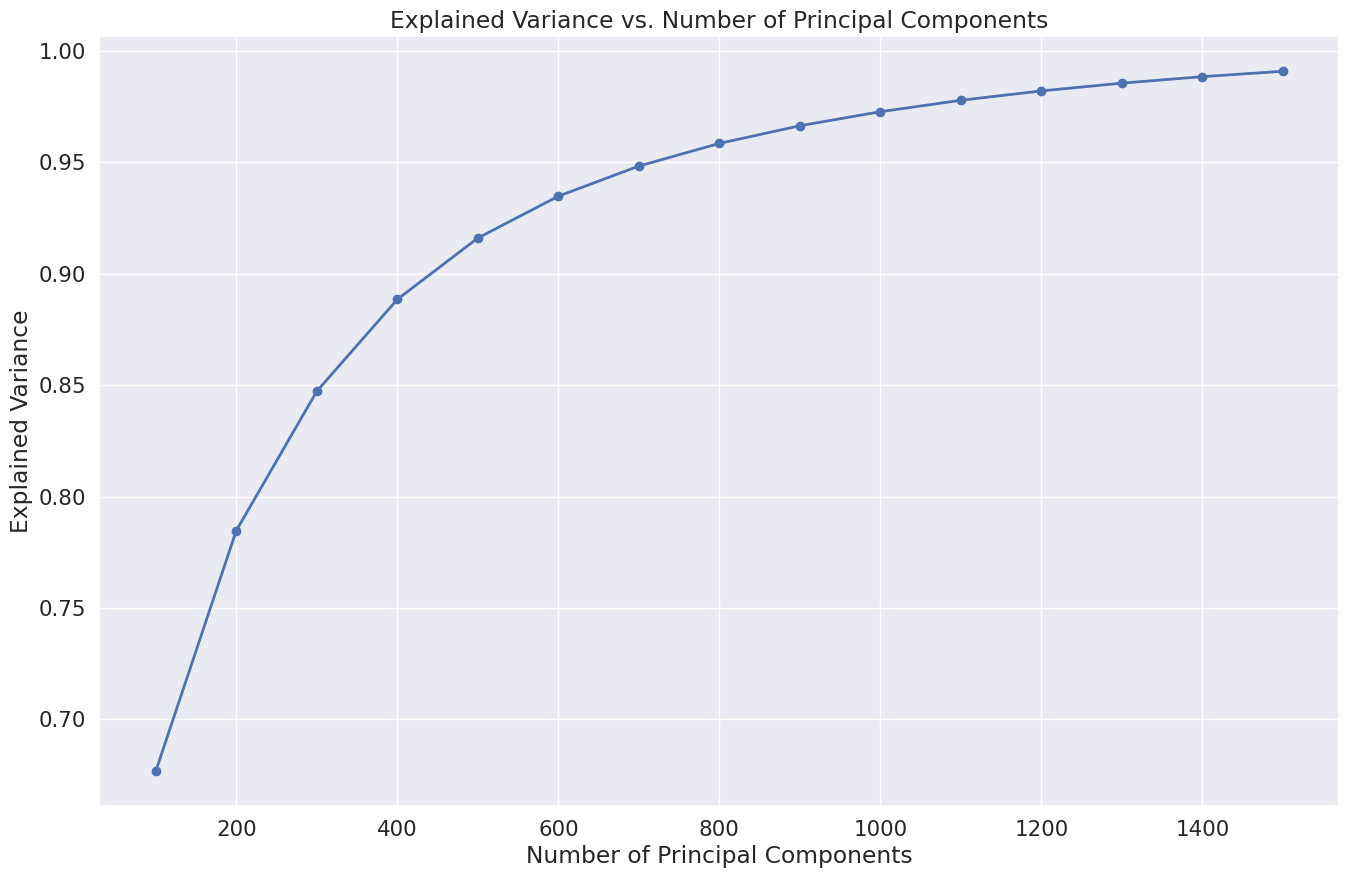

In [ ]:
# Plot the explained variances
plt.plot(n_components_range, explained_variances, 'bo-', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.show()

De acordo com um artigo no que li no medium, a fim de evitar Overfitting, nosso explained variance ratio deve chegar a cerca de 0.8, ou 80%. Nesse caso, portanto, opto por usar 300 componentes, reduzindo o dataset original para 12,5% (dimensionalmente falando) de seu total, e retendo 85% da variância. Posso depois optar por alterar o número de componentes, se resultar em uma melhora em performance nos modelos

In [ ]:
pca=PCA(n_components=250)
pca.fit(scaled_data)

PCA(n_components=250)

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.8188841778502939

Com os componentes escolhidos, aplico PCA nos dataframes de treino e teste

In [ ]:
X_train_pca = pca.transform(X_train_resampled)

X_test_pca = pca.transform(X_test_base)

print(f"Shape of X_train_pca: {X_train_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")

print(f"Shape of y_train_resampled: {y_train_resampled.shape}")
print(f"Shape of y_test: {y_test_base.shape}")

Shape of X_train_pca: (17230, 250)
Shape of X_test_pca: (4804, 250)
Shape of y_train_resampled: (17230,)
Shape of y_test: (4804,)


Por fim normalizo os subsets de treino e teste por meio do scaler, e, a fim de facilitar a minha vida depois, volto a utilizar os seus nomes padrão.

In [ ]:
X_train = scaler.fit_transform(X_train_pca)
X_test = scaler.fit_transform(X_test_pca)
y_train = y_train_resampled
y_test = y_test_base

In [ ]:
df_train = pd.DataFrame(data=X_train)

# Calculate the correlation between each feature and the target variable
correlations = df_train.corrwith(y_train)


# sort the correlations in descending order and get the top 20
top_20_correlations = correlations.abs().sort_values(ascending=False).head(20)

# print the top 20 correlated features
print(top_20_correlations)

0      0.516221
1      0.287266
4      0.264767
6      0.186433
3      0.167371
72     0.134659
224    0.120006
10     0.111478
7      0.108577
69     0.100671
18     0.095502
195    0.094984
2      0.093102
17     0.092386
64     0.088112
238    0.085431
5      0.084223
74     0.083979
152    0.083292
66     0.081242
dtype: float64


### Aplicação de modelos depois da preparação dos dados

Função que recebe o modelo como entrada e realiza o treinamento com cross validation

In [ ]:
def run_model(model, X_train, y_train, X_test, y_test, n_folds=10):
    # create empty lists to store scores and predictions for each fold
    train_scores = []
    test_scores = []
    y_preds = []

    # create stratified k-fold cross-validation object
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    # loop over each fold
    for train_index, test_index in skf.split(X_train, y_train):
        # split data into training and validation sets for this fold
        X_train_fold, y_train_fold = X_train[train_index], y_train[train_index]
        X_val_fold, y_val_fold = X_train[test_index], y_train[test_index]

        # fit model on training set for this fold
        model.fit(X_train_fold, y_train_fold)

        # calculate and store training and validation scores for this fold
        train_score = model.score(X_train_fold, y_train_fold)
        test_score = model.score(X_val_fold, y_val_fold)
        train_scores.append(train_score)
        test_scores.append(test_score)

        # predict target variable for test set for this fold and store predictions
        y_pred = model.predict(X_test)
        y_preds.append(y_pred)

    # calculate mean training and validation scores over all folds
    train_scores_mean = np.mean(train_scores)
    test_scores_mean = np.mean(test_scores)

    # create dictionary of results
    results = {
        "train_scores": train_scores,
        "test_scores": test_scores,
        "y_preds": y_preds,
        "train_scores_mean": train_scores_mean,
        "test_scores_mean": test_scores_mean,
    }

    # print out scores and classification report
    print("Train scores:", [round(score, 3) for score in train_scores])
    print(f"Mean train score: {train_scores_mean:.3f}\n")
    print("Test scores:", [round(score, 3) for score in test_scores])
    print(f"Mean test score: {test_scores_mean:.3f}")
    print(f"Standard deviation of test scores: {np.std(test_scores):.3f}\n")
    y_test_pred = results["y_preds"][-1]
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))

    return results

In [ ]:
def plot_confusion_matrix(results, y_test, datasetNum):
    y_pred = results["y_preds"][-1]
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5, 4))
    if(datasetNum == 1):
       sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Aligned', 'Aligned'], yticklabels=['Not Aligned', 'Aligned'])
    elif (datasetNum == 2):
       sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Flocking', 'Flocking'], yticklabels=['Not Flocking', 'Flocking'])
    else:
       sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Grouped', 'Grouped'], yticklabels=['Not Grouped', 'Grouped'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
lr = LogisticRegression(max_iter= 1000)

lr_dict = run_model(lr, X_train, y_train, X_test, y_test)

Train scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean train score: 1.000

Test scores: [0.999, 1.0, 0.999, 1.0, 1.0, 0.999, 1.0, 1.0, 0.997, 0.999]
Mean test score: 0.999
Standard deviation of test scores: 0.001

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3330
           1       0.83      1.00      0.90      1474

    accuracy                           0.94      4804
   macro avg       0.91      0.95      0.93      4804
weighted avg       0.95      0.94      0.94      4804



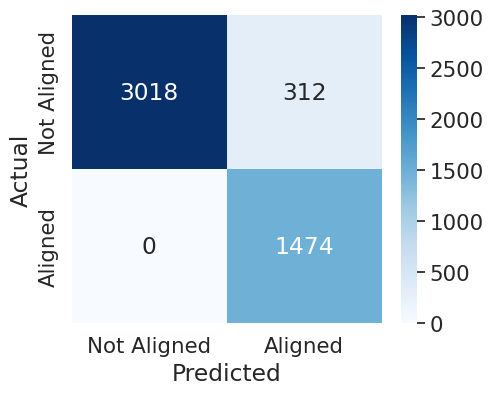

In [ ]:
plot_confusion_matrix(lr_dict, y_test, 1)

####K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the range of k values to try
k_range = range(1, 31)

# Initialize an empty list to store the test accuracy for each value of k
test_accuracies = []

# Loop over each value of k and fit the model to the train set
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate the test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Store the test accuracy in the list
    test_accuracies.append(test_accuracy)

# Find the best value of k
best_k = k_range[np.argmax(test_accuracies)]
print("Best value of k:", best_k)

Best value of k: 1


In [267]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=1)

knn_dict = run_model(knn, X_train, y_train, X_test, y_test)

Train scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean train score: 1.000

Test scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean test score: 1.000
Standard deviation of test scores: 0.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3330
           1       1.00      1.00      1.00      1474

    accuracy                           1.00      4804
   macro avg       1.00      1.00      1.00      4804
weighted avg       1.00      1.00      1.00      4804



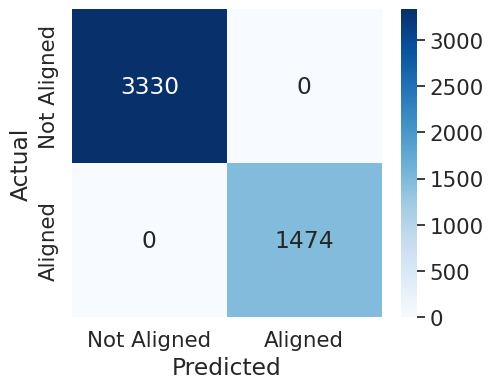

In [ ]:
plot_confusion_matrix(knn_dict, y_test, 1)

#### LVQ

In [ ]:
pip install sklearn-lvq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn_lvq import GlvqModel

lvq = GlvqModel(prototypes_per_class=3, initial_prototypes=None, max_iter=2500, gtol=1e-05, beta=2, c=None, random_state=42)

lvq_dict = run_model(lvq, X_train, y_train, X_test, y_test)

Train scores: [0.857, 0.834, 0.851, 0.851, 0.67, 0.851, 0.852, 0.831, 0.671, 0.826]
Mean train score: 0.809

Validation scores: [0.842, 0.835, 0.867, 0.843, 0.671, 0.844, 0.86, 0.82, 0.681, 0.835]
Mean validation score: 0.810

Test scores: [0.922, 0.914, 0.918, 0.915, 0.813, 0.915, 0.919, 0.91, 0.813, 0.908]
Mean test score: 0.895
Standard deviation of test scores: 0.041

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3330
           1       0.97      0.72      0.83      1474

    accuracy                           0.91      4804
   macro avg       0.93      0.86      0.88      4804
weighted avg       0.91      0.91      0.90      4804



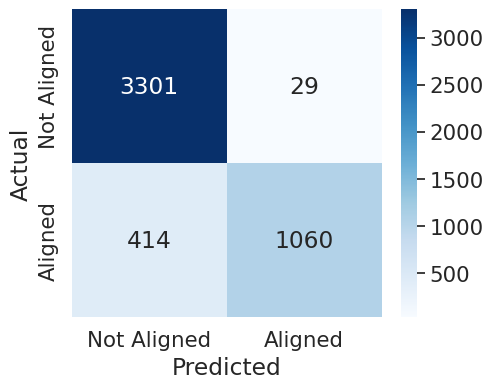

In [ ]:
plot_confusion_matrix(lvq_dict, y_test, 1)

### SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')

svm_dict = run_model(svm, X_train, y_train, X_test, y_test)

Train scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean train score: 1.000

Test scores: [1.0, 0.999, 1.0, 0.999, 0.999, 0.999, 1.0, 1.0, 0.999, 1.0]
Mean test score: 1.000
Standard deviation of test scores: 0.000

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3330
           1       0.82      0.98      0.89      1474

    accuracy                           0.93      4804
   macro avg       0.91      0.94      0.92      4804
weighted avg       0.94      0.93      0.93      4804



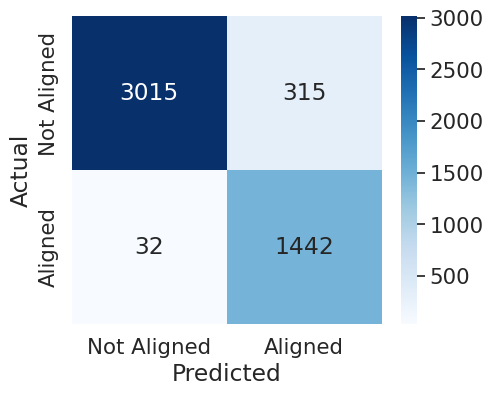

In [ ]:
plot_confusion_matrix(svm_dict, y_test, 1)